In [1]:
import numpy as np
from Models import *
from Utilities import *
import matplotlib.pyplot as plt

bow = splitlist(readfile("Data\\BOW.txt"))
features_bow = bow[1]
labels_bow = bow[0]
features_bow = np.array(features_bow)
labels_bow = np.array(labels_bow)
print("Number of samples BOW: ", len(features_bow))
print("Intial Shape of samples BOW: ", features_bow.shape)
#features_bow, labels_bow= not_null(features_bow, labels_bow)
print("Shape of samples BOW after not null: ", features_bow.shape)
features_bow_scalled=  notglobalscale(features_bow)

Number of samples BOW:  20000
Intial Shape of samples BOW:  (20000, 314)
Shape of samples BOW after not null:  (20000, 314)


In [2]:
import umap.umap_ as umap
embeddings = umap.UMAP().fit(features_bow_scalled, labels_bow)

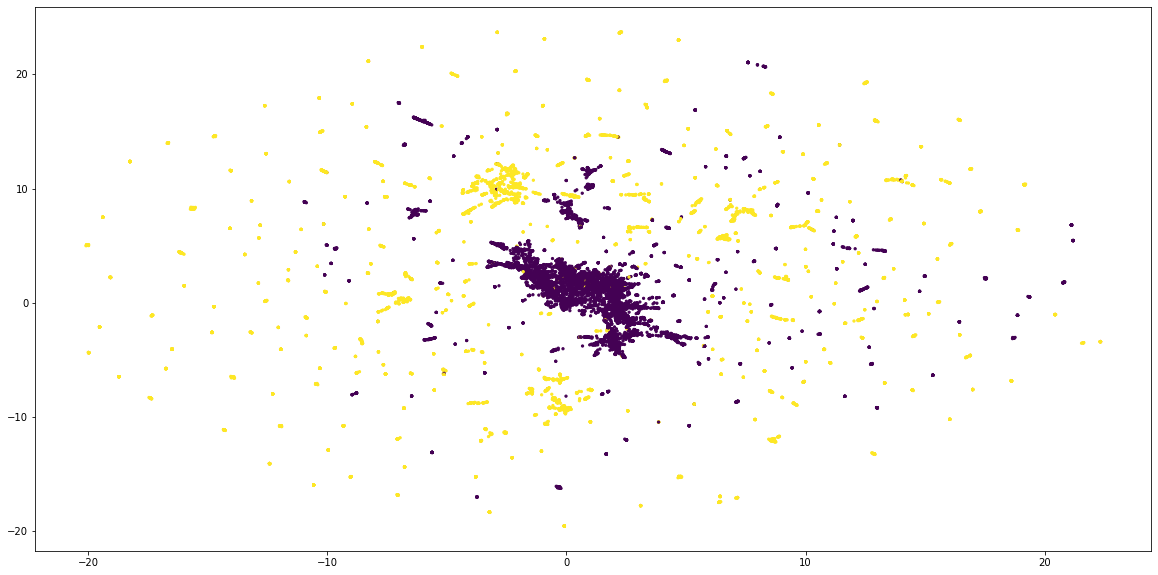

In [11]:
X_scalled = embeddings.transform(features_bow_scalled)
plt.rcParams["figure.figsize"] = (20, 10)
plt.scatter(X_scalled[:, 0], X_scalled[:, 1], c=labels_bow, s=5);

(10000, 314)


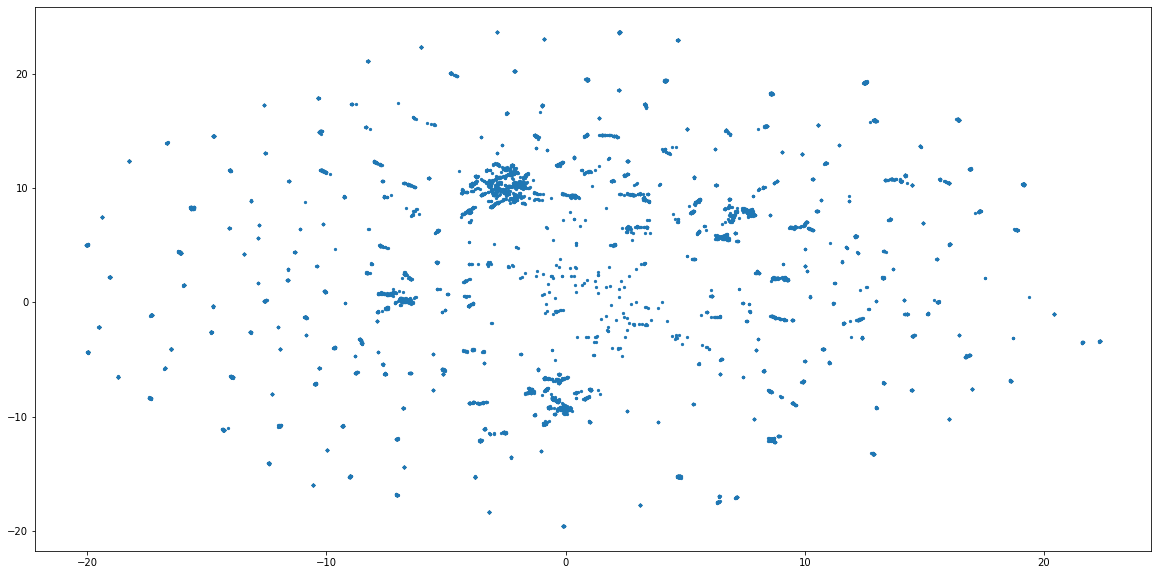

In [12]:
features_mal = [y for x,y in enumerate(features_bow_scalled) if x%2 == 0]
features_mal = np.array(features_mal)
print(features_mal.shape)
X_mal = embeddings.transform(features_mal)
plt.rcParams["figure.figsize"] = (20, 10)
plt.scatter(X_mal[:, 0], X_mal[:, 1], s=5);

(10000, 314)


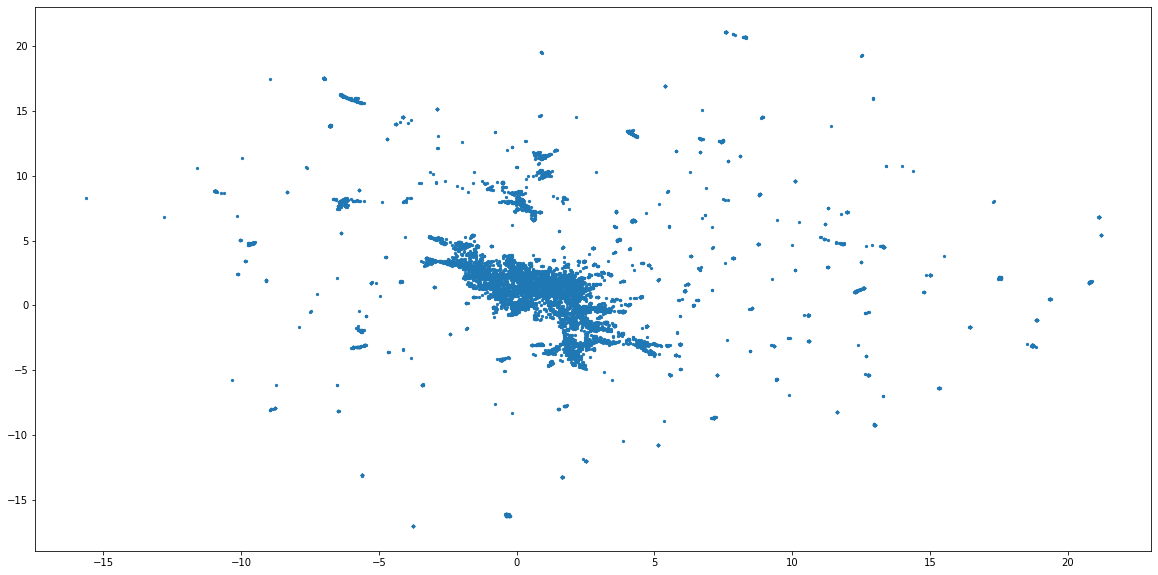

In [13]:
features_beg = [y for x,y in enumerate(features_bow_scalled) if x%2 != 0]
features_beg = np.array(features_beg)
print(features_beg.shape)
X_beg = embeddings.transform(features_beg)
plt.rcParams["figure.figsize"] = (20, 10)
plt.scatter(X_beg[:, 0], X_beg[:, 1], s=5);

In [22]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer
from sklearn.impute import SimpleImputer 
pipe = make_pipeline(SimpleImputer(strategy="mean"), QuantileTransformer())
X_test = pipe.fit_transform(features_bow_scalled)
manifold = umap.UMAP().fit(X_test, labels_bow)
X_reduced_2 = manifold.transform(X_test)

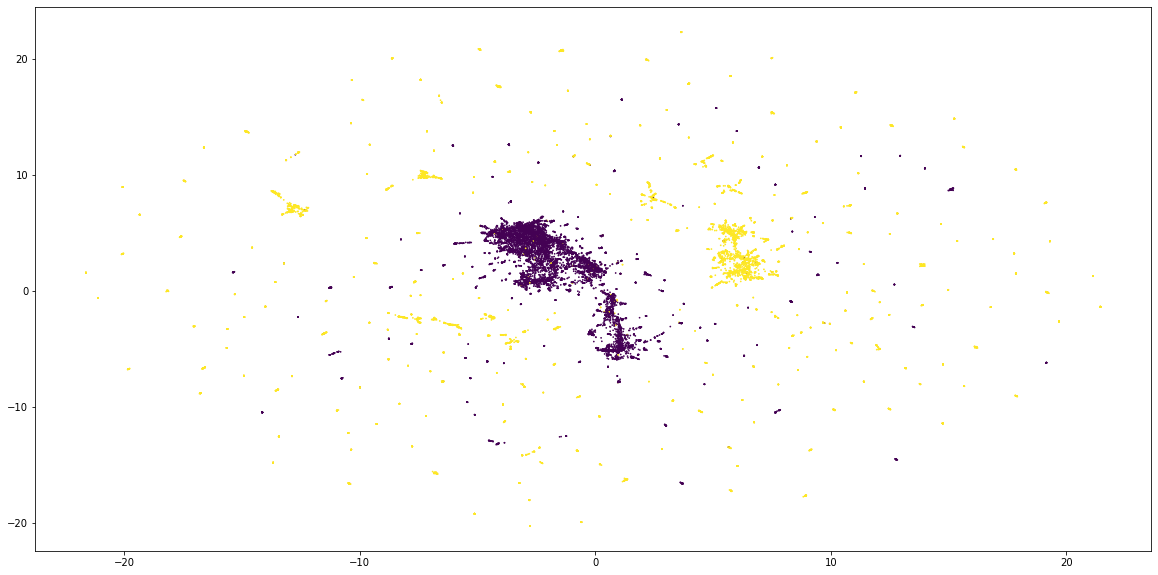

In [23]:
plt.scatter(X_reduced_2[:, 0], X_reduced_2[:, 1], c=labels_bow, s=0.5);

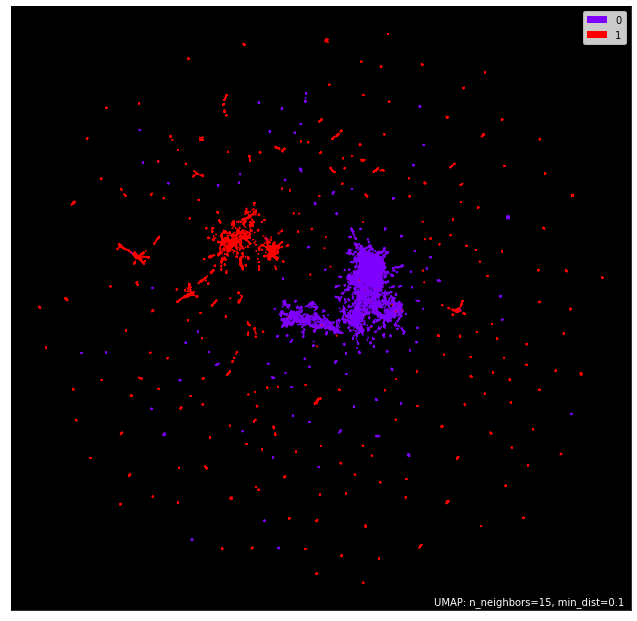

In [18]:
import umap.plot
y_encoded = pd.factorize(labels_bow)[0]
manifold_test = umap.UMAP().fit(X_test, y_encoded)
umap.plot.points(manifold_test, labels=labels_bow, theme="fire");

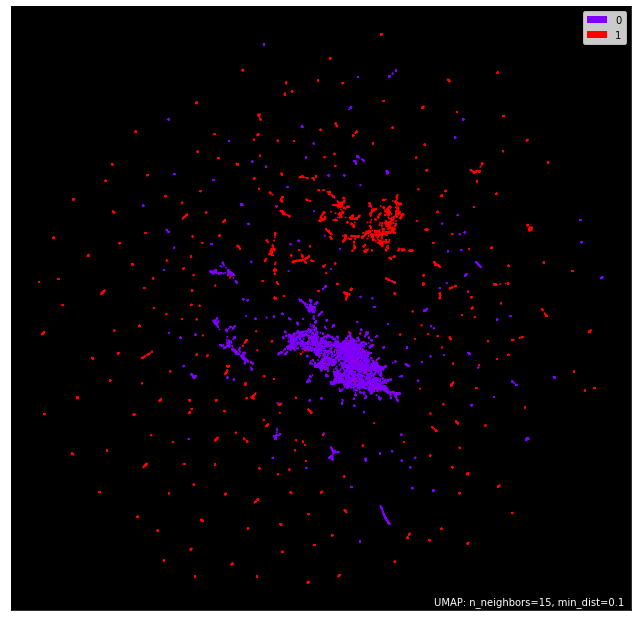

In [19]:

manifold_test2 = umap.UMAP().fit(features_bow_scalled, labels_bow)
umap.plot.points(manifold_test2, labels=labels_bow, theme="fire");

In [45]:
import numpy as np
from sklearn.cluster import DBSCAN

X= X_mal
labels_true = [y for x,y in enumerate(labels_bow) if x%2 == 0]

db = DBSCAN(eps=0.6, min_samples=40).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(labels_true, labels)
)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

Estimated number of clusters: 72
Estimated number of noise points: 3383
Homogeneity: 1.000
Completeness: 0.000
V-measure: 0.000
Adjusted Rand Index: 0.000
Adjusted Mutual Information: -0.000
Silhouette Coefficient: 0.214


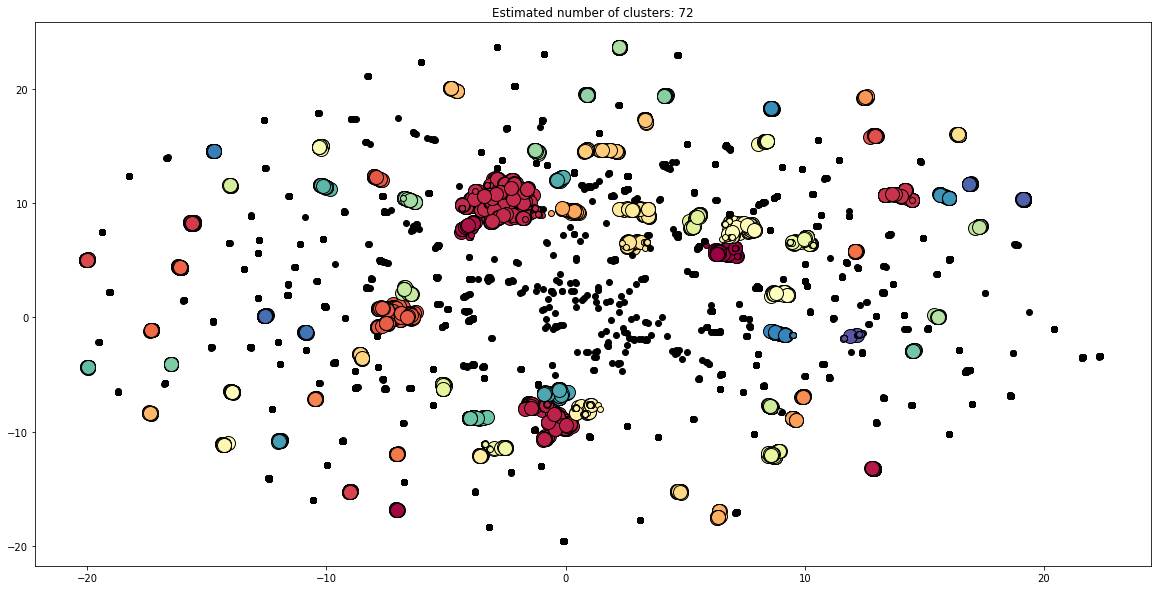

In [46]:

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()
